In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib_inline as plt
%matplotlib inline

/kaggle/input/social-network-ads/Social_Network_Ads.csv


The first thing is to bring the dataset:

In [2]:
df = pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')

Now let´s see at high level, what it looks like:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


So, we can see that there is no Null data in the dataset so this is always a good thing!!

Let´s plot the data to see if there is some correlation:

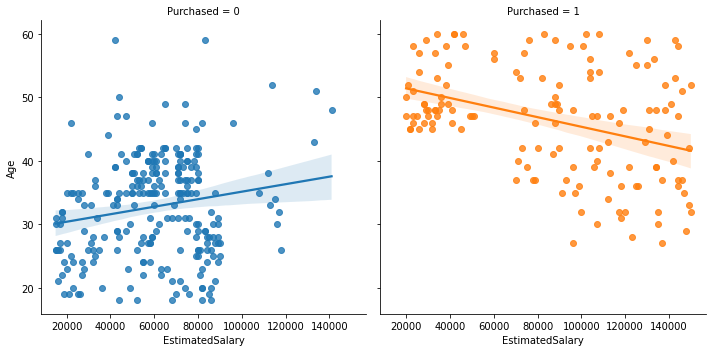

In [4]:
sns.lmplot(x = 'EstimatedSalary', y = 'Age', data = df, hue = 'Purchased', col = 'Purchased')

So, based on this graphs it seems that the product is more likely to be buyed by old people and with higer incomes. Let´s see quantitative if this is true

In [5]:
avg_age = np.mean(df['Age'])
avg_income = np.mean(df['EstimatedSalary'])

avg_age_purchased = np.mean(np.mean(df[df['Purchased'] == 1]['Age']))
avg_income_purchased = np.mean(np.mean(df[df['Purchased'] == 1]['EstimatedSalary']))


print(f'The average age of the dataset is {int(avg_age)} and the average of incomes is {int(avg_income)}. However the average age of those who has purchased the product is {int(avg_age_purchased)} and the average incomes is {int(avg_income_purchased)}' )

The average age of the dataset is 37 and the average of incomes is 69742. However the average age of those who has purchased the product is 46 and the average incomes is 86272


So, now let´s make some Machine Learning Random Forest Classifier to perform an algorithm that predicts if a person, based on its age and incomes, will purchased a product or not.

First we have to split the dataset into dependent and undependent variables

In [6]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

Now, let´s split the data into training and testing datasets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

Then we create a class of random forest classification

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 600)

Let´s fit the model and predict the outcomes based on the test set

In [9]:
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

Now let´s see the classification report

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        80
           1       0.80      0.93      0.86        40

    accuracy                           0.90       120
   macro avg       0.88      0.91      0.89       120
weighted avg       0.91      0.90      0.90       120



As we can see here, the macro average is 88% and the weighted average is 91% and the recall is pretty high for this model to.

Now, let´s print the confusion matrix

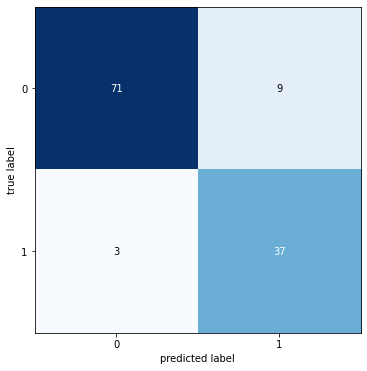

In [11]:
conf_matrix = confusion_matrix(y_test,predictions)

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))

But now, let´s try a Decision Tree model to see if it´s better than the random forest classification.

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
predictions_dtree = dtree.predict(X_test)

In [14]:
print(classification_report(y_test,predictions_dtree))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90        80
           1       0.76      0.88      0.81        40

    accuracy                           0.87       120
   macro avg       0.85      0.87      0.86       120
weighted avg       0.88      0.87      0.87       120



As we can see here, compared with the report of the Random Forest Classification, the precision of the decision tree is higher but the recall is lower in a more proportional way. This is explained by a lower F1-score in the decisiton tree model than in the random forest.

Finally if we print the confusion matrix it is expected to see more false positives or/and more false negatives.

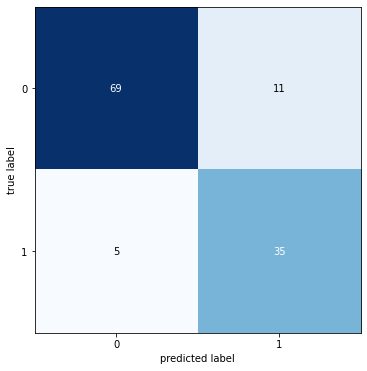

In [15]:
conf_matrix_dtree = confusion_matrix(y_test,predictions_dtree)

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_dtree, figsize=(6, 6))